In [6]:
from prophet import Prophet
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('./data_daily_ts.csv')
data.head()

,Unnamed: 0,Itemname,Quantity,Date,Price,Country,Price_Total
0,0,white hanging heart t-light holder,6,2010-12-01,2.55,United Kingdom,15.30
1,1,white metal lantern,6,2010-12-01,3.39,United Kingdom,20.34
2,2,cream cupid hearts coat hanger,8,2010-12-01,2.75,United Kingdom,22.00
3,3,knitted union flag hot water bottle,6,2010-12-01,3.39,United Kingdom,20.34
4,4,red woolly hottie white heart.,6,2010-12-01,3.39,United Kingdom,20.34


In [8]:
df_data_group = data.groupby(by="Date",sort=True).agg({"Quantity":"mean","Price_Total":"mean"})

In [9]:
df_data_group

,Quantity,Price_Total
Date,,
2010-12-01,8.743363,19.143038
2010-12-02,15.190592,23.145432
2010-12-03,6.581643,21.433266
2010-12-05,6.074594,11.733733
2010-12-06,5.603439,14.192582
...,...,...
2011-12-05,8.382599,16.676911
2011-12-06,9.340282,17.386024
2011-12-07,17.932554,32.186272


In [10]:
#df_data_group.drop(columns=["Date"],inplace=True)

In [11]:
df_data_group.reset_index(inplace=True)

In [12]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [13]:
df_data_group.Quantity.mean()

10.371329959126827

In [14]:
df_data_group.Price_Total.mean()

19.522372374196816

In [15]:
df_data_group.Quantity.replace(0,10.09, inplace=True)

In [16]:
df_data_group.Quantity.replace(0,19.52, inplace=True)

In [17]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [18]:
df_data_group

,Date,Quantity,Price_Total
0,2010-12-01,8.743363,19.143038
1,2010-12-02,15.190592,23.145432
2,2010-12-03,6.581643,21.433266
3,2010-12-05,6.074594,11.733733
4,2010-12-06,5.603439,14.192582
...,...,...,...
300,2011-12-05,8.382599,16.676911
301,2011-12-06,9.340282,17.386024
302,2011-12-07,17.932554,32.186272
303,2011-12-08,7.148905,16.978282


In [19]:
quanitity_df = df_data_group.drop(columns=['Price_Total'])

In [20]:
price_total_df= df_data_group.drop(columns=['Quantity'])

In [21]:
price_total_df

,Date,Price_Total
0,2010-12-01,19.143038
1,2010-12-02,23.145432
2,2010-12-03,21.433266
3,2010-12-05,11.733733
4,2010-12-06,14.192582
...,...,...
300,2011-12-05,16.676911
301,2011-12-06,17.386024
302,2011-12-07,32.186272
303,2011-12-08,16.978282


# Fazendo a modelagem pelo preço

Feature engineering

In [22]:
prophet_df = price_total_df.rename(columns = {'Date':'ds', 'Price_Total':'y'})

In [23]:
prophet_df

,ds,y
0,2010-12-01,19.143038
1,2010-12-02,23.145432
2,2010-12-03,21.433266
3,2010-12-05,11.733733
4,2010-12-06,14.192582
...,...,...
300,2011-12-05,16.676911
301,2011-12-06,17.386024
302,2011-12-07,32.186272
303,2011-12-08,16.978282


modelagem

In [24]:
model = Prophet()

In [25]:
model.add_country_holidays(country_name='BR')

In [26]:
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = model.make_future_dataframe(periods = 365)

In [28]:
forecast = model.predict(future)

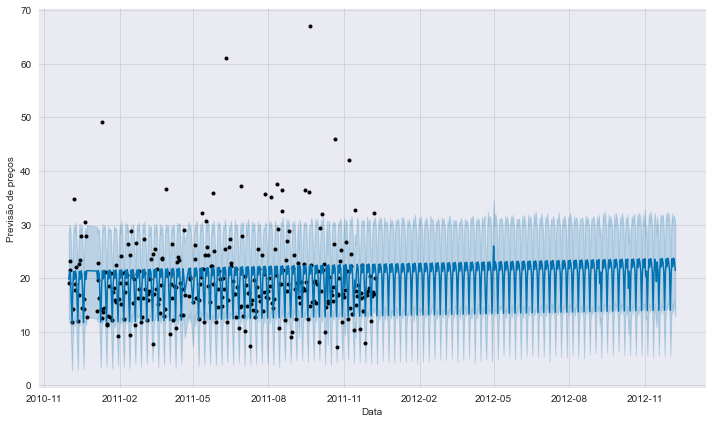

In [29]:
model.plot(forecast, xlabel='Data', ylabel='Previsão de preços');

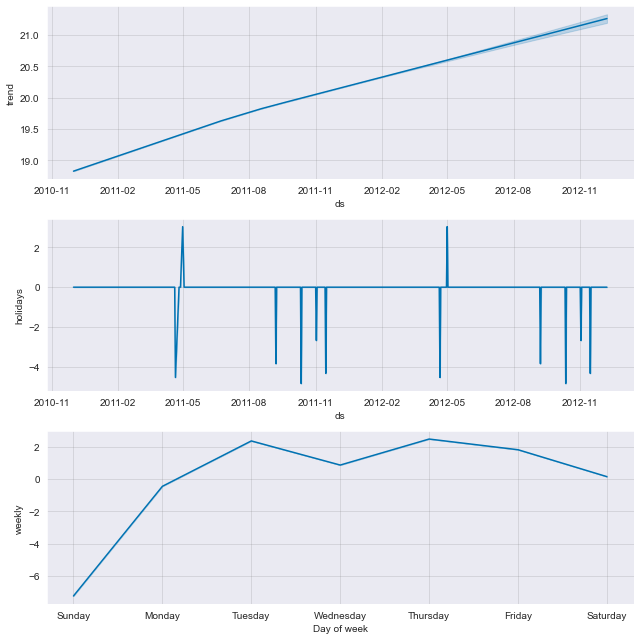

In [30]:
model.plot_components(forecast);

validação

In [50]:
from prophet.diagnostics import cross_validation
df_cv_p = cross_validation(model, horizon = '31 days')
df_cv_p.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-06,11.019408,4.138715,17.834390,12.171983,2011-03-05
1,2011-03-07,16.416016,9.117732,23.162198,16.967252,2011-03-05
2,2011-03-08,22.870310,16.037645,29.663955,15.844359,2011-03-05
3,2011-03-09,18.152367,11.230593,25.033100,17.624875,2011-03-05
4,2011-03-10,18.611323,11.605057,25.344121,19.752679,2011-03-05


In [32]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv_p)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,30.073462,5.483928,4.350642,0.274179,0.222206,0.233102,0.850340
1,5 days,31.316621,5.596125,4.215841,0.243782,0.206724,0.215829,0.850340
2,6 days,30.035034,5.480423,4.014453,0.228515,0.159709,0.205970,0.833333
3,7 days,29.719970,5.451602,4.142078,0.210978,0.159709,0.205095,0.863946
4,8 days,33.695326,5.804768,4.693311,0.251115,0.212174,0.235664,0.819048


C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


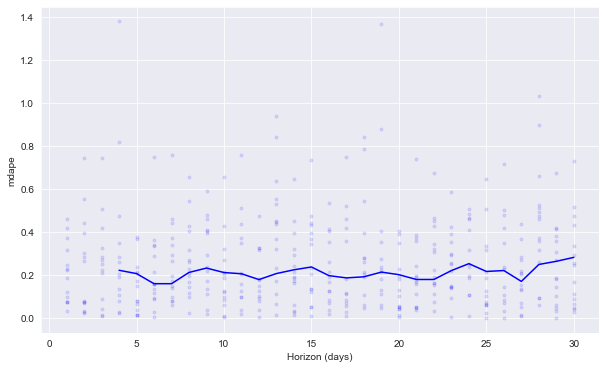

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_p, metric='mdape');

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


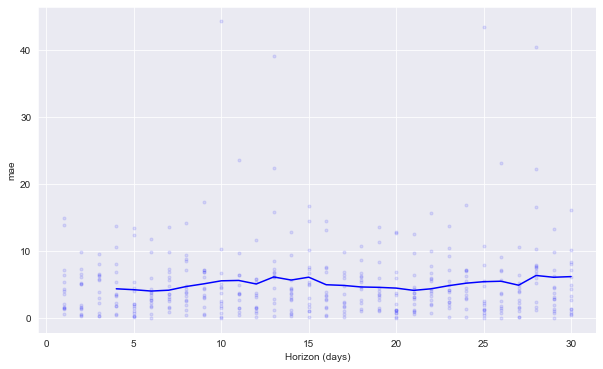

In [34]:
fig = plot_cross_validation_metric(df_cv_p, metric='mae')

In [42]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,59.332521,7.702761,5.517501,0.289841,0.23041,0.264802,0.751708


Hyperparameters tunning

In [35]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000173E6378D00>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000173E63CCCA0>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  7.420673
1                     0.001                     0.10  7.343170
2                     0.001                     1.00  7.327919
3                     0.001                    10.00  7.332281
4                     0.010                     0.01  7.416256
5                     0.010                     0.10  7.332304
6                     0.010                     1.00  7.351146
7                     0.010                    10.00  7.309739
8                     0.100                     0.01  7.501649
9                     0.100                     0.10  7.352497
10                    0.100                     1.00  7.357588
11                    0.100                    10.00  7.357628
12                    0.500                     0.01  7.791442
13                    0.500                     0.10  7.689861
14                    0.500                     1.00  7

In [36]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}


criamos o modelo passando os novos parametros, e treinamos os mesmo

In [43]:
model = Prophet(**best_params)
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


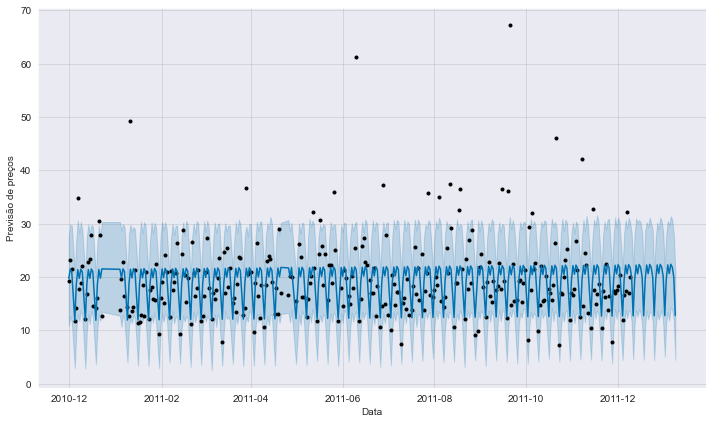

In [46]:
model.plot(forecast, xlabel='Data', ylabel='Previsão de preços');

In [51]:
df_cv_p = cross_validation(model, horizon = '31 days')
df_cv_p.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-06,11.019408,4.231691,17.788170,12.171983,2011-03-05
1,2011-03-07,16.416016,9.611422,23.708055,16.967252,2011-03-05
2,2011-03-08,22.870310,16.537778,29.143139,15.844359,2011-03-05
3,2011-03-09,18.152367,11.454313,24.887601,17.624875,2011-03-05
4,2011-03-10,18.611323,12.439354,24.996972,19.752679,2011-03-05


In [52]:
df_p = performance_metrics(df_cv_p)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,24.030570,4.902098,3.982343,0.251800,0.156812,0.220876,0.860465
1,3 days 12:00:00,23.517435,4.849478,3.929924,0.242215,0.172384,0.214931,0.860465
2,4 days 00:00:00,64.908192,8.056562,5.032049,0.254308,0.193647,0.239591,0.813953
3,4 days 12:00:00,62.909594,7.931557,4.774061,0.228031,0.172384,0.218835,0.848837
4,5 days 00:00:00,63.864844,7.991548,4.801830,0.226275,0.172447,0.217011,0.811047


In [53]:
df_p.rmse.mean()

7.237002580265028

## Model Quantity

In [37]:
quanitity_df

,Date,Quantity
0,2010-12-01,8.743363
1,2010-12-02,15.190592
2,2010-12-03,6.581643
3,2010-12-05,6.074594
4,2010-12-06,5.603439
...,...,...
300,2011-12-05,8.382599
301,2011-12-06,9.340282
302,2011-12-07,17.932554
303,2011-12-08,7.148905


Feature engineering

In [57]:
prophet_df_quant = quanitity_df.rename(columns = {'Date':'ds', 'Quantity':'y'})

modelagem

In [58]:
quanitity_df

,Date,Quantity
0,2010-12-01,8.743363
1,2010-12-02,15.190592
2,2010-12-03,6.581643
3,2010-12-05,6.074594
4,2010-12-06,5.603439
...,...,...
300,2011-12-05,8.382599
301,2011-12-06,9.340282
302,2011-12-07,17.932554
303,2011-12-08,7.148905


In [59]:
model_q = Prophet()
model_q.add_country_holidays(country_name='BR')
model_q.fit(prophet_df_quant)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = model_q.make_future_dataframe(periods = 365)
forecast = model_q.predict(future)

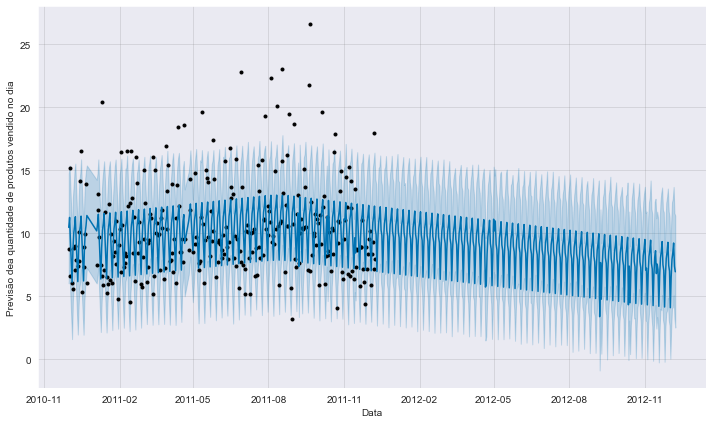

In [61]:
model_q.plot(forecast, xlabel='Data', ylabel='Previsão dea quantidade de produtos vendido no dia');

validacao

In [62]:
df_cv = cross_validation(model_q, horizon = '30 days')
df_cv.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-14 00:00:00 and 2011-11-09 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-15,11.500362,7.729193,15.277726,6.592718,2011-03-14
1,2011-03-16,10.881955,7.149201,14.496545,15.002317,2011-03-14
2,2011-03-17,12.050174,8.435145,15.991625,9.987836,2011-03-14
3,2011-03-18,10.907290,7.060387,14.428958,10.843478,2011-03-14
4,2011-03-20,7.088690,3.143203,10.909200,9.879831,2011-03-14


In [63]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,11.644606,3.412419,2.803313,0.347316,0.248822,0.271380,0.704082
1,5 days,9.441128,3.072642,2.464162,0.300924,0.204653,0.236295,0.795918
2,6 days,8.723209,2.953508,2.404600,0.305717,0.226009,0.239791,0.857143
3,7 days,10.487762,3.238481,2.679308,0.267747,0.247912,0.245956,0.809524
4,8 days,13.760499,3.709515,3.070328,0.302387,0.268384,0.275540,0.747619


In [66]:
df_p.rmse.mean()

3.6511756978612593

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


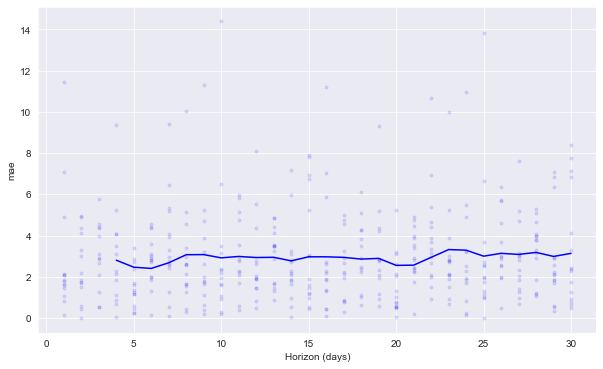

In [67]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\mathe\anaconda3\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


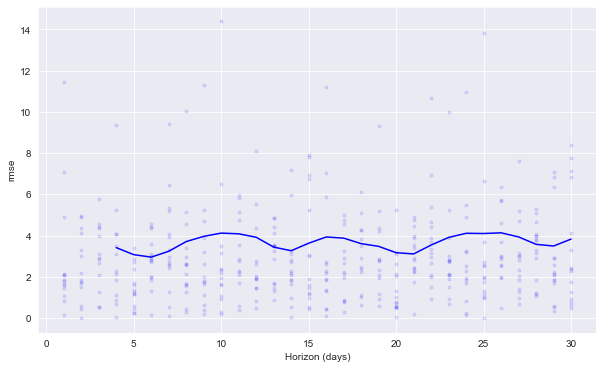

In [68]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

Olhar outras variantes

hyperparametros

In [69]:


param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(prophet_df_quant)  # Fit model with given params
    df_cv = cross_validation(m, horizon='31 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000173E9831B50>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000173EA7AC190>
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  3.758059
1                     0.001                     0.10  3.639962
2                     0.001                     1.00  3.646335
3                     0.001                    10.00  3.641083
4                     0.010                     0.01  3.787418
5                     0.010                     0.10  3.656757
6                     0.010                     1.00  3.650489
7                     0.010                    10.00  3.677279
8                     0.100                     0.01  3.762740
9                     0.100                     0.10  3.630369
10                    0.100                     1.00  3.629121
11                    0.100                    10.00  3.627150
12                    0.500                     0.01  3.788748
13                    0.500                     0.10  3.662752
14                    0.500                     1.00  3

In [70]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


Criamos o modelo passando os novos parametros, e treinamos os mesmo

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


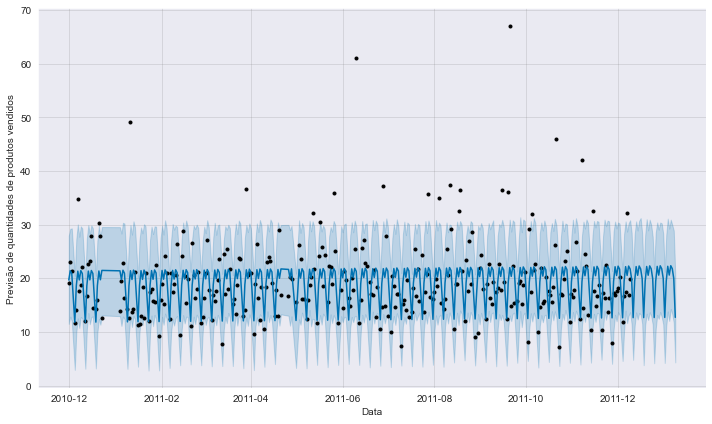

In [71]:
model_q = Prophet(**best_params)
model_q.fit(prophet_df)
future = model.make_future_dataframe(periods = 30)
forecast = model.predict(future)
model.plot(forecast, xlabel='Data', ylabel='Previsão de quantidades de produtos vendidos');

In [72]:
df_cv_q = cross_validation(model_q, horizon = '31 days')
df_cv_q.head()

INFO:prophet:Making 17 forecasts with cutoffs between 2011-03-05 00:00:00 and 2011-11-08 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-06,11.021316,4.347526,17.441702,12.171983,2011-03-05
1,2011-03-07,16.434795,9.696332,22.961118,16.967252,2011-03-05
2,2011-03-08,22.908582,16.120201,29.561245,15.844359,2011-03-05
3,2011-03-09,18.177870,11.144991,24.984084,17.624875,2011-03-05
4,2011-03-10,18.638505,11.539638,25.607768,19.752679,2011-03-05


In [75]:
df_cv_q.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-03-06,11.021316,4.347526,17.441702,12.171983,2011-03-05
1,2011-03-07,16.434795,9.696332,22.961118,16.967252,2011-03-05
2,2011-03-08,22.908582,16.120201,29.561245,15.844359,2011-03-05
3,2011-03-09,18.177870,11.144991,24.984084,17.624875,2011-03-05
4,2011-03-10,18.638505,11.539638,25.607768,19.752679,2011-03-05
5,2011-03-11,19.614138,12.441183,25.894855,23.561663,2011-03-05
6,2011-03-13,10.904485,4.369501,18.146090,7.768015,2011-03-05
7,2011-03-14,16.317964,9.479606,22.438729,24.569724,2011-03-05
8,2011-03-15,22.791751,16.185051,29.334309,17.022769,2011-03-05
9,2011-03-16,18.061039,10.754100,25.476728,25.432630,2011-03-05


In [73]:
future = model_q.make_future_dataframe(periods = 30)
forecast = model_q.predict(future)
df_p = performance_metrics(df_cv_p)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,24.030570,4.902098,3.982343,0.251800,0.156812,0.220876,0.860465
1,3 days 12:00:00,23.517435,4.849478,3.929924,0.242215,0.172384,0.214931,0.860465
2,4 days 00:00:00,64.908192,8.056562,5.032049,0.254308,0.193647,0.239591,0.813953
3,4 days 12:00:00,62.909594,7.931557,4.774061,0.228031,0.172384,0.218835,0.848837
4,5 days 00:00:00,63.864844,7.991548,4.801830,0.226275,0.172447,0.217011,0.811047


In [74]:
df_p.rmse.mean()

7.237002580265028

In [76]:
df_p.mae.mean()

5.020994842587727

In [77]:
df_p.mape.mean()

0.24941417052485496